In [7]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/countries-data/sales_data_sample.csv (1).csv


In [19]:
import pandas as pd

df = pd.read_csv('/kaggle/input/countries-data/sales_data_sample.csv (1).csv',encoding="windows-1252")
print(df.head())

   ORDERNUMBER  QUANTITYORDERED  PRICEEACH  ORDERLINENUMBER    SALES  \
0        10107               30      95.70                2  2871.00   
1        10121               34      81.35                5  2765.90   
2        10134               41      94.74                2  3884.34   
3        10145               45      83.26                6  3746.70   
4        10159               49     100.00               14  5205.27   

         ORDERDATE   STATUS  QTR_ID  MONTH_ID  YEAR_ID  ...  \
0   2/24/2003 0:00  Shipped       1         2     2003  ...   
1    5/7/2003 0:00  Shipped       2         5     2003  ...   
2    7/1/2003 0:00  Shipped       3         7     2003  ...   
3   8/25/2003 0:00  Shipped       3         8     2003  ...   
4  10/10/2003 0:00  Shipped       4        10     2003  ...   

                    ADDRESSLINE1  ADDRESSLINE2           CITY STATE  \
0        897 Long Airport Avenue           NaN            NYC    NY   
1             59 rue de l'Abbaye           NaN

In [21]:
print(df.columns)

Index(['ORDERNUMBER', 'QUANTITYORDERED', 'PRICEEACH', 'ORDERLINENUMBER',
       'SALES', 'ORDERDATE', 'STATUS', 'QTR_ID', 'MONTH_ID', 'YEAR_ID',
       'PRODUCTLINE', 'MSRP', 'PRODUCTCODE', 'CUSTOMERNAME', 'PHONE',
       'ADDRESSLINE1', 'ADDRESSLINE2', 'CITY', 'STATE', 'POSTALCODE',
       'COUNTRY', 'TERRITORY', 'CONTACTLASTNAME', 'CONTACTFIRSTNAME',
       'DEALSIZE'],
      dtype='object')


In [63]:
df['profit'] = df['SALES'] - (df['PRICEEACH']*df['QUANTITYORDERED'])

df['profit_margin'] = (df['profit']) / (df['SALES'] *100 ) .round(2)
print(df)

      ORDERNUMBER  QUANTITYORDERED  PRICEEACH  ORDERLINENUMBER    SALES  \
0           10107               30      95.70                2  2871.00   
1           10121               34      81.35                5  2765.90   
2           10134               41      94.74                2  3884.34   
3           10145               45      83.26                6  3746.70   
4           10159               49     100.00               14  5205.27   
...           ...              ...        ...              ...      ...   
2818        10350               20     100.00               15  2244.40   
2819        10373               29     100.00                1  3978.51   
2820        10386               43     100.00                4  5417.57   
2821        10397               34      62.24                1  2116.16   
2822        10414               47      65.52                9  3079.44   

            ORDERDATE    STATUS  QTR_ID  MONTH_ID  YEAR_ID  ...  \
0      2/24/2003 0:00   Shipped 

In [64]:
import sqlite3

conn = sqlite3.connect('sales.db')
df.to_sql('sales_data', conn, if_exists='replace', index=False)

query = """
SELECT COUNTRY, YEAR_ID, ROUND(AVG(PROFIT_MARGIN), 2) AS AVG_MARGIN, SUM(SALES) AS TOTAL_SALES
FROM sales_data
GROUP BY COUNTRY, YEAR_ID
ORDER BY TOTAL_SALES DESC;
"""
result = pd.read_sql(query,conn)
result.head()


,COUNTRY,YEAR_ID,AVG_MARGIN,TOTAL_SALES
0,USA,2004,0.0,1685470.69
1,USA,2003,0.0,1305147.88
2,USA,2005,0.0,637364.26
3,France,2004,0.0,555198.70
4,Spain,2004,0.0,483545.36


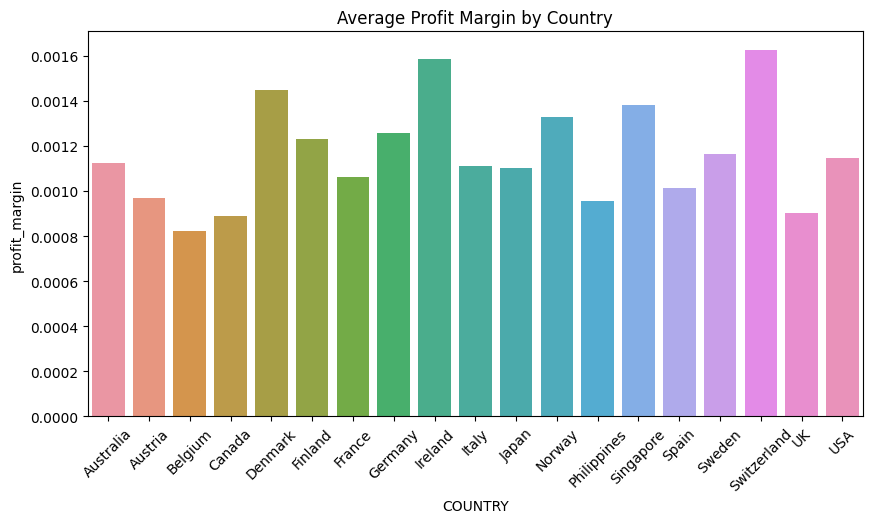

In [69]:
import matplotlib.pyplot as plt
import seaborn as sns


plt.figure(figsize=(10,5))
sns.barplot(data=df.groupby('COUNTRY')['profit_margin'].mean().reset_index(),
            x='COUNTRY', y='profit_margin')
plt.title('Average Profit Margin by Country')
plt.xticks(rotation=45)
plt.show()
